In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# PATH FOR RMSD XVG FILES
path_wam = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cwam.xvg"
path_wch = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cwch.xvg"
path_wop = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cwop.xvg"
path_wc36 = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cwc36m.xvg"
path_mam = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cmam.xvg"
path_mch = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cmch.xvg"
path_mop = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cmop.xvg"
path_mc36 = r"C:\Users\vaibh\Documents\Analysis\Code\Code\RMSF\rmsf_cmc36m.xvg"

In [3]:
data = []

In [4]:
ff = ['wam', 'wch', 'wop', 'wc36', 'mam', 'mch', 'mop', 'mc36']

In [5]:
for f in ff:
    with open(globals()[f'path_{f}'], 'r') as file:
        lines = file.readlines()
        
    flag=False
    tmp = []
    for x in lines:
        if not flag:
            if x.strip() == "@TYPE xy":
                flag=True
            continue
        tmp.append(float(x.split()[1]))
        
    data.append(tmp)
    del tmp      
        

In [6]:
idx = list(range(161, 201))

In [7]:
df = pd.DataFrame(data=data, columns=idx, index=ff)
df = df.transpose()
df.head(5)

,wam,wch,wop,wc36,mam,mch,mop,mc36
161,0.4660,0.3185,0.4568,0.4531,0.8787,0.2562,0.3892,0.4753
162,0.3261,0.2453,0.2100,0.3239,0.7564,0.2021,0.2083,0.3229
163,0.2348,0.1841,0.1090,0.2311,0.6501,0.1490,0.1170,0.2388
164,0.1704,0.1849,0.0884,0.2153,0.5629,0.1511,0.0832,0.2053
165,0.1514,0.1497,0.0972,0.1648,0.4300,0.1311,0.1013,0.1407


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 161 to 200
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   wam     40 non-null     float64
 1   wch     40 non-null     float64
 2   wop     40 non-null     float64
 3   wc36    40 non-null     float64
 4   mam     40 non-null     float64
 5   mch     40 non-null     float64
 6   mop     40 non-null     float64
 7   mc36    40 non-null     float64
dtypes: float64(8)
memory usage: 2.8 KB


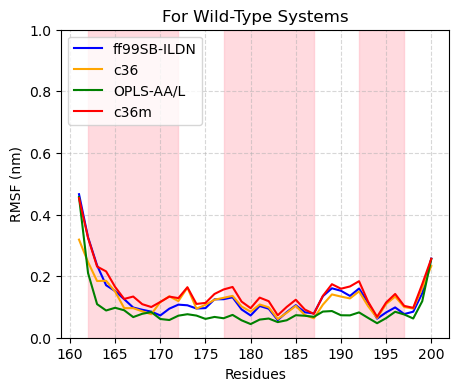

In [32]:
plt.figure(figsize=(5, 4))
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 'wam', 'wch', 'wop', 'wc36' with solid lines
plt.plot(df.index, df['wam'], label='ff99SB-ILDN', color='blue', linestyle='-')
plt.plot(df.index, df['wch'], label='c36', color='orange', linestyle='-')
plt.plot(df.index, df['wop'], label='OPLS-AA/L', color='green', linestyle='-')
plt.plot(df.index, df['wc36'], label='c36m', color='red', linestyle='-')

plt.axvspan(162, 172, color='lightpink', alpha=0.5)
plt.axvspan(177, 187, color='lightpink', alpha=0.5)
plt.axvspan(192, 197, color='lightpink', alpha=0.5)

plt.title('For Wild-Type Systems')
plt.xlabel('Residues')
plt.ylabel('RMSF (nm)')
plt.ylim(0,1)
plt.legend()
plt.savefig('rmsf_wt.jpg', dpi=600)

plt.show()

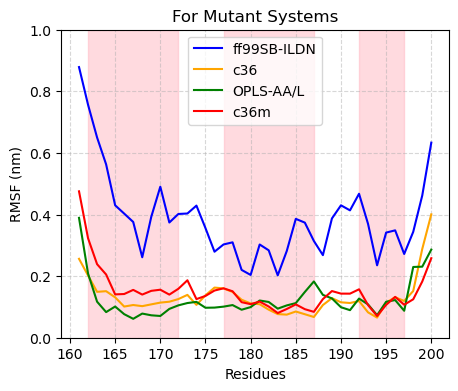

In [31]:
plt.figure(figsize=(5, 4))
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 'mam', 'mch', 'mop', 'mc36' with dashed lines
plt.plot(df.index, df['mam'], label='ff99SB-ILDN', color='blue', linestyle='-')
plt.plot(df.index, df['mch'], label='c36', color='orange', linestyle='-')
plt.plot(df.index, df['mop'], label='OPLS-AA/L', color='green', linestyle='-')
plt.plot(df.index, df['mc36'], label='c36m', color='red', linestyle='-')
plt.axvspan(162, 172, color='lightpink', alpha=0.5)
plt.axvspan(177, 187, color='lightpink', alpha=0.5)
plt.axvspan(192, 197, color='lightpink', alpha=0.5)

plt.title('For Mutant Systems')
plt.xlabel('Residues')
plt.ylabel('RMSF (nm)')
plt.ylim(0,1)
plt.legend()
plt.savefig('rmsf_mt.jpg', dpi=600)

plt.show()